In [10]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
BATCH_SIZE=32
Img_size=256
CHANNELS=3
dataset=tf.keras.preprocessing.image_dataset_from_directory("Leaf_photos/",shuffle=True,batch_size=32,image_size=(Img_size,Img_size))

Found 4072 files belonging to 3 classes.


In [14]:
dataset.class_names

['EarlyBlight', 'Healthy', 'LateBlight']

In [9]:
len(dataset)

128

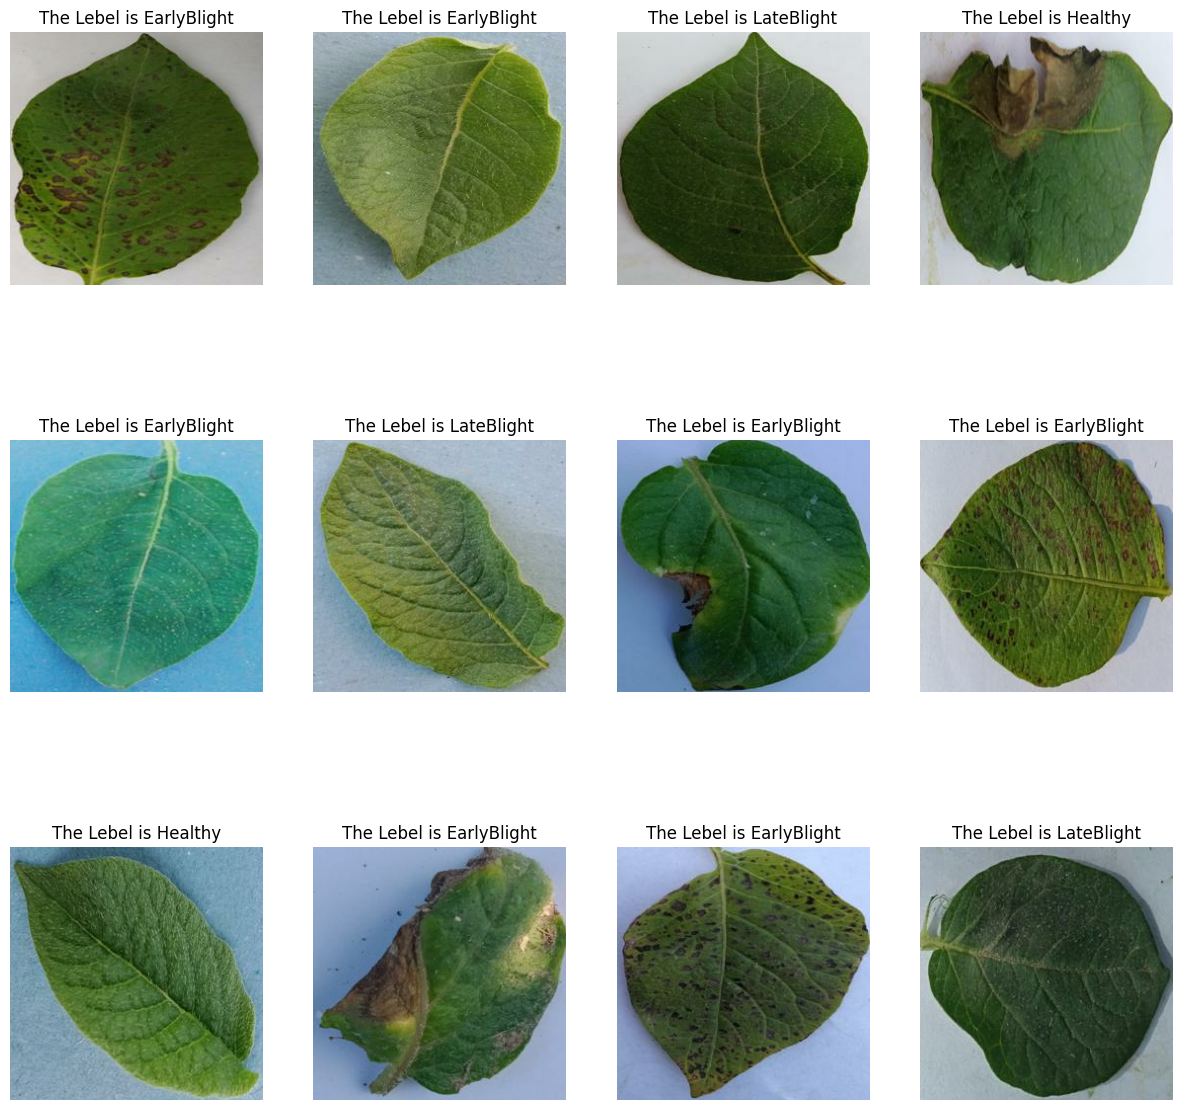

In [19]:
plt.figure(figsize=(15,15))
for img,label in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.title(f"The Lebel is {dataset.class_names[label[i]]}")
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.axis("off")   

In [31]:
def get_data(dataset,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    len_ds=len(dataset)
    if shuffle:
        dataset.shuffle(shuffle_size,seed=12)
    train_ds_size=round(len(dataset)*train_split)
    test_ds_size=round(len(dataset)*test_split)
    train_ds=dataset.take(train_ds_size)
    test_ds=dataset.take(test_ds_size)
    val_ds_size=round(len(train_ds)*val_split)
    validation_ds=dataset.take(val_ds_size)

    return train_ds,test_ds,validation_ds

In [32]:
train_ds,test_ds,validatoin_ds=get_data(dataset)

In [33]:
len(train_ds),len(test_ds),len(validatoin_ds)

(102, 13, 10)

In [34]:
train_ds=train_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
validatoin_ds=validatoin_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)